# IoT23 Data Preprocessing with 1 million samples 

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import time as timer

In [20]:
data= pd.read_csv('D:\JupyterNotebook\GitHub\IoT-BotNet-detection-on-IoT23-dataset\IoT23\Data files\iot23_combined_1M.csv',low_memory=False,error_bad_lines=False)

In [21]:
data.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS


Oh..! we have extra column.. lets get rid of it 

In [22]:
del data['Unnamed: 0']

In [23]:
data.shape

(1244676, 21)

Ok...! now we have our data with 21 features ! and around 6 million samples..! 
Its time to clean the data and bring it in good format! 

In [24]:
df= data.drop(columns=['ts','id.orig_p','id.resp_p','uid','id.orig_h','id.resp_h','local_orig','local_resp'])

In [25]:
y=df['label']

In [26]:
y.isnull().sum()

0

In [70]:
y.unique()

array(['POHS', 'Okiru', 'DDoS', 'C&C-HeartBeat', 'Benign', 'C&C-Torii',
       'C&C', 'C&C-FileDownload', 'FileDownload',
       'C&C-HeartBeat-FileDownload', 'Attack', 'C&C-Mirai'], dtype=object)

In [27]:
X=df.iloc[:,:-1]

In [28]:
X.isnull().sum()

proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
dtype: int64

In [30]:
X.replace('-',0, inplace=True)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244676 entries, 0 to 1244675
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   proto          1244676 non-null  object 
 1   service        1244676 non-null  object 
 2   duration       1244676 non-null  object 
 3   orig_bytes     1244676 non-null  object 
 4   resp_bytes     1244676 non-null  object 
 5   conn_state     1244676 non-null  object 
 6   missed_bytes   1244676 non-null  float64
 7   history        1244676 non-null  object 
 8   orig_pkts      1244676 non-null  float64
 9   orig_ip_bytes  1244676 non-null  float64
 10  resp_pkts      1244676 non-null  float64
 11  resp_ip_bytes  1244676 non-null  float64
dtypes: float64(5), object(7)
memory usage: 114.0+ MB


In [38]:
X['orig_bytes']=X['orig_bytes'].astype(float)

In [39]:
X['duration']=X['duration'].astype(float)

In [40]:
X['resp_bytes']=X['resp_bytes'].astype(float)

In [41]:
X.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,tcp,0,0.000003,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
1,tcp,0,0.000002,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
2,tcp,0,0.000002,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
3,tcp,0,0.000002,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
4,tcp,0,0.000002,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0


In [42]:
cat_df =X.select_dtypes(include=['object']).copy()

In [43]:
cat_df

,proto,service,conn_state,history
0,tcp,0,S0,S
1,tcp,0,S0,S
2,tcp,0,S0,S
3,tcp,0,S0,S
4,tcp,0,S0,S
...,...,...,...,...
1244671,tcp,0,S0,S
1244672,tcp,0,S0,S
1244673,tcp,0,S0,S
1244674,tcp,0,S0,S


In [44]:
cat_new= pd.get_dummies(cat_df, columns=['proto','service','conn_state','history'])

In [45]:
cat_new

,proto_icmp,proto_tcp,proto_udp,service_0,service_dhcp,service_dns,service_http,service_irc,service_ssl,conn_state_OTH,...,history_ShAfFa,history_ShAfdtDr,history_ShAr,history_ShDadAf,history_ShR,history_ShwAadDfr,history_Sr,history_^c,history_^d,history_^dDA
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244671,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1244672,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1244673,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1244674,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
num_df =X.select_dtypes(exclude=['object']).copy()

In [47]:
Xe = pd.concat([num_df,cat_new], axis=1)

In [48]:
Xe.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,...,history_ShAfFa,history_ShAfdtDr,history_ShAr,history_ShDadAf,history_ShR,history_ShwAadDfr,history_Sr,history_^c,history_^d,history_^dDA
0,0.000003,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Xe = np.asarray(Xe).astype(np.float32)

In [50]:
le=LabelEncoder()

In [51]:
Y=le.fit_transform(y)

In [60]:
Y

array([11, 11, 11, ..., 11, 11, 11])

In [ ]:
le.inverse_transform(Y)

In [53]:
x_scaler=MinMaxScaler()

In [54]:
x_scaler.fit(Xe)

MinMaxScaler()

In [55]:
Normalized_x=x_scaler.transform(Xe)

In [56]:
Normalized_x

array([[6.1253468e-11, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.0835644e-11, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.0835644e-11, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [57]:
Normalized_x.shape

(1244676, 116)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(Normalized_x, Y, random_state=10, test_size=0.30)

In [62]:
X_train.shape

(871273, 116)

In [63]:
X_test.shape

(373403, 116)

In [64]:
Y_train.shape

(871273,)

In [65]:
Y_test.shape

(373403,)

In [66]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 1.18 seconds


In [67]:
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

In [71]:
labels=['POHS', 'Okiru', 'DDoS', 'C&C-HeartBeat', 'Benign', 'C&C-Torii',
       'C&C', 'C&C-FileDownload', 'FileDownload',
       'C&C-HeartBeat-FileDownload', 'Attack', 'C&C-Mirai']

In [72]:
print(classification_report(Y_test, y_gnb, target_names=labels, digits=4))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                      POHS     0.6667    0.0625    0.1143        32
                     Okiru     0.9983    0.1022    0.1854     44681
                      DDoS     0.6654    0.1145    0.1954      4498
             C&C-HeartBeat     0.9000    0.7500    0.8182        12
                    Benign     0.2367    0.5104    0.3234        96
                 C&C-Torii     0.5000    0.8000    0.6154         5
                       C&C     0.0000    0.0000    0.0000         1
          C&C-FileDownload     0.2500    0.1111    0.1538         9
              FileDownload     1.0000    0.8216    0.9020     41591
C&C-HeartBeat-FileDownload     0.0000    0.0000    0.0000         3
                    Attack     0.0000    0.0000    0.0000     79044
                 C&C-Mirai     0.6097    1.0000    0.7575    203431

                  accuracy                         0.6501    373403
                 macro avg     0.4856    0.356

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

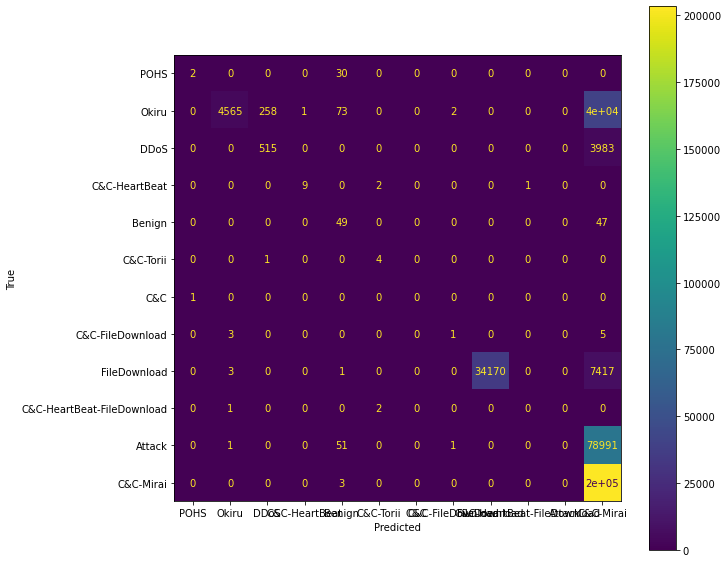

In [78]:
cm = confusion_matrix(Y_test, y_gnb)
cmd = ConfusionMatrixDisplay(cm, display_labels=['POHS', 'Okiru', 'DDoS', 'C&C-HeartBeat', 'Benign', 'C&C-Torii',
       'C&C', 'C&C-FileDownload', 'FileDownload','C&C-HeartBeat-FileDownload', 'Attack', 'C&C-Mirai'])
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [76]:
print("Classification report for GNB: \n{}".format(classification_report(Y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(Y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(Y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(Y_test,y_gnb,average='weighted',zero_division=1)
rec_gnb = recall_score(Y_test,y_gnb,average='weighted',zero_division=1)
f1_gnb = f1_score(Y_test,y_gnb,average='weighted',zero_division=1)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        32
           1       1.00      0.10      0.19     44681
           2       0.67      0.11      0.20      4498
           3       0.90      0.75      0.82        12
           4       0.24      0.51      0.32        96
           5       0.50      0.80      0.62         5
           6       0.00      0.00      0.00         1
           7       0.25      0.11      0.15         9
           8       1.00      0.82      0.90     41591
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00     79044
          11       0.61      1.00      0.76    203431

    accuracy                           0.65    373403
   macro avg       0.49      0.36      0.34    373403
weighted avg       0.57      0.65      0.54    373403

Confusion matrix for GNB: 
[[     2      0      0      0     30      0      0      0      0      0
  

In [84]:
start = timer.time()
Rf_clf=RandomForestClassifier(n_estimators = 300, criterion = 'gini', random_state =124)
Rf_clf.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 353.31 seconds


In [85]:
start = timer.time()
y_RF = Rf_clf.predict(X_test)
y_RF_prob = Rf_clf.predict_proba(X_test)
end = timer.time()
print("Finished testing within {:.2f} seconds".format(end-start))

Finished testing within 38.87 seconds


In [86]:
print("Classification report for RF: \n{}".format(classification_report(Y_test,y_RF)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(Y_test,y_RF)))
print("Accuracy score for RF: {:.4f}".format(accuracy_score(Y_test,y_RF)))
# calculate precision, recall, and f1 scores
prec_RF = precision_score(Y_test,y_RF,average='weighted')
rec_RF = recall_score(Y_test,y_RF,average='weighted')
f1_RF = f1_score(Y_test,y_RF,average='weighted')
print("Precision score for RF: {:.4}".format(prec_gnb))
print("Recall score for RF: {:.4}".format(rec_gnb))
print("F1 score for RF: {:.4}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.69      0.78      0.74        32
           1       1.00      0.11      0.20     44681
           2       1.00      0.11      0.21      4498
           3       0.85      0.92      0.88        12
           4       0.92      0.51      0.66        96
           5       1.00      0.60      0.75         5
           6       0.00      0.00      0.00         1
           7       1.00      0.33      0.50         9
           8       1.00      0.82      0.90     41591
           9       0.50      0.67      0.57         3
          10       0.69      0.00      0.00     79044
          11       0.61      1.00      0.76    203431

    accuracy                           0.65    373403
   macro avg       0.77      0.49      0.51    373403
weighted avg       0.72      0.65      0.54    373403

Confusion matrix for RF: 
[[    25      5      0      0      2      0      0      0      0      0
    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for RF: 0.7829
Recall score for RF: 0.6501
F1 score for RF: 0.5378
